На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:  

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные  

Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый. 
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.  

In [12]:
import pandas as pd
from scipy import stats 
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [13]:
picture_size = pd.read_csv('/home/vitsli/DataAnalitycs/statistic_lessons/5_task_1.csv')

In [20]:
picture_size.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [9]:
a = picture_size[picture_size.group == 'A'].events
b = picture_size[picture_size.group == 'B'].events
c = picture_size[picture_size.group == 'C'].events

In [10]:
a.head(10)

0    14
1    41
2    30
3    37
4    38
5    34
6    24
7    20
8    35
9    28
Name: events, dtype: int64

Для оценки результатов теста однофакторный дисперсионный анализ. Предварительно оценим гомогенность дисперсий в группах, а также оценим нормальность распределений в группах.

In [23]:
# проверяем по методу Левина гомогенность (одинаковость) дисперсии в группах 
stats.levene(a, b, c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [24]:
stats.normaltest(a)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [25]:
stats.normaltest(b)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [26]:
stats.normaltest(c)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [12]:
stats.f_oneway(a, b, c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Тест показал наличие статзначимых различий между группами. Для проверки того, между какими именно группами есть различия применим критерий Тьюки.

In [28]:
pg.pairwise_tukey(data=picture_size, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


Разница имеется между всеми группами, однако наилучший результат продемонстрировали квадратные картинки, которые можно рекомендовать использовать для всех пользователей

__Тестирование обновления кнопки заказа__

In [29]:
button_test = pd.read_csv('/home/vitsli/DataAnalitycs/statistic_lessons/5_task_2.csv')

In [31]:
button_test.head(10)

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
5,49481,test,high,81.0
6,95408,test,high,57.0
7,7582,test,high,67.0
8,32404,test,high,73.0
9,12624,test,high,76.0


In [32]:
button_test.segment.unique()

array(['high', 'low'], dtype=object)

<AxesSubplot:>

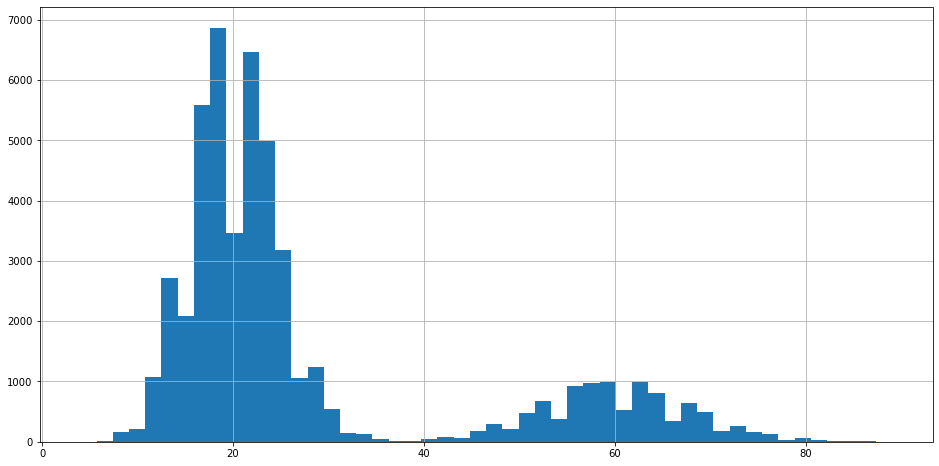

In [20]:
plt.figure(figsize=(16, 8))
button_test.query('group == "control"').events.hist(bins=50)

<AxesSubplot:>

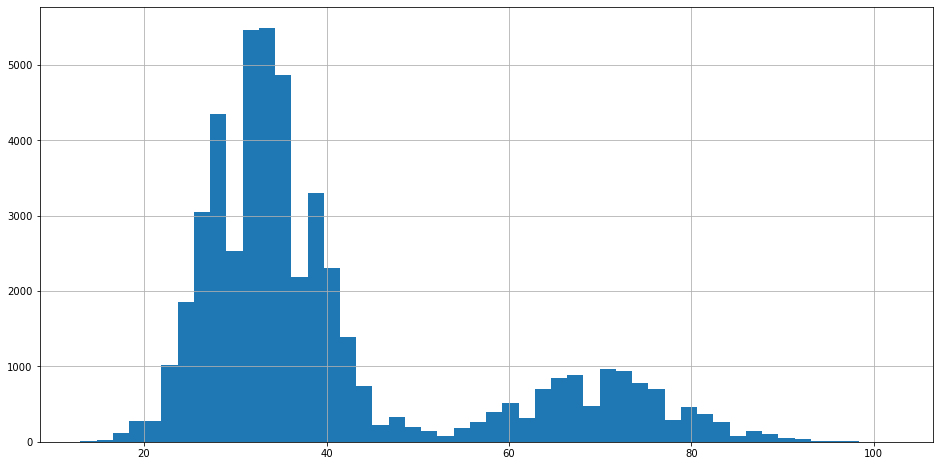

In [48]:
plt.figure(figsize=(16, 8))
button_test.query('group == "test"').events.hist(bins=50)

In [33]:
button_test.groupby(['group', 'segment'], as_index=False)\
            .agg({'events': 'mean'})\
            .rename(columns={'events': 'mean'}) 

,group,segment,mean
0,control,high,59.970800
1,control,low,20.031575
2,test,high,69.938500
3,test,low,33.025925


In [35]:
button_test.groupby(['group', 'segment'], as_index=False)\
            .agg({'events': 'median'})\
            .rename(columns={'events': 'median'}) 

,group,segment,median
0,control,high,60.0
1,control,low,20.0
2,test,high,70.0
3,test,low,33.0


Для данного теста используем многофакторный дисперсионный анализ(ANOVA)

In [53]:
button_test.query('group == "test" and segment == "high"').events.std()

8.403974085398076

In [54]:
button_test.query('group == "control" and segment == "high"').events.std()

7.805346866345566

In [55]:
button_test.query('group == "test" and segment == "low"').events.std()

5.720845313076868

In [56]:
button_test.query('group == "control" and segment == "low"').events.std()

4.473575565622444

In [83]:
a = (button_test.query('group == "test" and segment == "high"').events)

In [84]:
b = (button_test.query('group == "control" and segment == "high"').events)

In [85]:
c = (button_test.query('group == "test" and segment == "low"').events)

In [86]:
d = (button_test.query('group == "control" and segment == "low"').events)

In [88]:
stats.levene(a, b, c, d)

LeveneResult(statistic=2983.609682903818, pvalue=0.0)

In [87]:
button_test.query('group == "control" and segment == "low"').events.describe()

count    40000.000000
mean        20.031575
std          4.473576
min          4.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         41.000000
Name: events, dtype: float64

In [37]:
model_interact = ols("events~C(group)*C(segment)", data=button_test).fit()
anova_lm(model_interact, typ = 2)

,sum_sq,df,F,PR(>F)
C(group),3.837195e+06,1.0,112031.864119,0.000000e+00
C(segment),2.362480e+07,1.0,689756.377485,0.000000e+00
C(group):C(segment),3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [38]:
button_test['combination'] = button_test['group'] + ' \ ' + button_test['segment']

In [39]:
button_test.head(10)

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
5,49481,test,high,81.0,test \ high
6,95408,test,high,57.0,test \ high
7,7582,test,high,67.0,test \ high
8,32404,test,high,73.0,test \ high
9,12624,test,high,76.0,test \ high


In [107]:
pg.pairwise_tukey(data=button_test, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control,test,28.01942,40.40844,-12.38902,0.10409,-119.021936,0.0,-0.752755


In [108]:
pg.pairwise_tukey(data=button_test, dv='events', between='segment')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,high,low,64.95465,26.52875,38.4259,0.067541,568.923864,0.0,4.497704


In [109]:
pg.pairwise_tukey(data=button_test, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control \ high,control \ low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,6.824282
1,control \ high,test \ high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.703109
2,control \ high,test \ low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.603981
3,control \ low,test \ high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-8.527429
4,control \ low,test \ low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.220314
5,test \ high,test \ low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,6.307128


<AxesSubplot:xlabel='group', ylabel='events'>

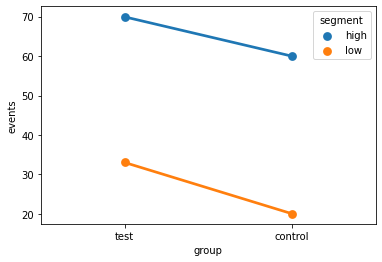

In [104]:
sns.pointplot(x='group', y='events', hue='segment', data=button_test)

По резултьтатам многофакторного дисперсионного анализа мы можем сделать вывод, что значимыми оказались как фактор групп, так и фактор сегмента пользователей, а также их комбинация. Средние значения увеличились в тестовой группе. Принимаем решение раскатывать новую версию на всех пользователей.